In [1]:
## Import Data

import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
##############Kaggel2 to apply kaggle1_model finedtuned RoBERTa##############

In [91]:
import os
os.getcwd()

'/home/skbae/Documents/skbae/ASD/paper/Pgm/Final'

In [92]:
pt = '/home/skbae/Documents/skbae/ASD/paper/Data/'

In [ ]:
# For 2nd Kaggla ASD data 

In [ ]:
# preprocessed Kagge2 data import

In [1]:
import pandas as pd

T_ASD2 = pd.read_csv('./ASD_CSV_T_ASD2_Feb23.csv')

In [2]:
T_ASD2.columns

Index(['CASE_NO_PATIENT'S', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'A10_Autism_Spectrum_Quotient', 'Social_Responsiveness_Scale',
       'Age_Years', 'Qchat_10_Score', 'Speech Delay/Language Disorder',
       'Learning disorder', 'Genetic_Disorders', 'Depression',
       'Global developmental delay/intellectual disability',
       'Social/Behavioural Issues', 'Childhood Autism Rating Scale',
       'Anxiety_disorder', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who_completed_the_test', 'ASD_traits',
       'A1_C2977673', 'A2_C0870532', 'A3_C4036288', 'A4_C0424091',
       'A5_C2371970', 'A6_C2370875', 'A7_C4064035', 'A8_C1854882',
       'A9_C0566243', 'A10_C4064319', 'combined'],
      dtype='object')

In [3]:
# option1 : without augmentation
df_m2=T_ASD2[['ASD_traits','combined']]

In [4]:
df_m2.columns =['Class','text']

In [5]:
df_m2.Class.value_counts()

Yes    1074
No      911
Name: Class, dtype: int64

In [6]:
ASD_mapping = {
    'No': 0, # TD
    'Yes' : 1, # ASD
}

df_m2['label'] = df_m2['Class'].replace(ASD_mapping)
df_m2.label.value_counts()

/tmp/ipykernel_1161748/3106382212.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_m2['label'] = df_m2['Class'].replace(ASD_mapping)


1    1074
0     911
Name: label, dtype: int64

In [ ]:
# Step 1: Load the Pre-Trained RoBERTa Model

In [10]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import random
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from transformers import Trainer
from transformers import DebertaTokenizer, AlbertTokenizer, BertTokenizer, RobertaTokenizer
from transformers import DebertaForSequenceClassification, AlbertForSequenceClassification, BertForSequenceClassification, RobertaForSequenceClassification
from transformers import TrainingArguments
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score, roc_auc_score, average_precision_score


2024-02-27 17:01:04.128478: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-27 17:01:04.155956: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-27 17:01:04.761892: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/skbae/anaconda3/envs/myNLP/lib/python3.9/site-packages/bitsandbytes/cextension.py:34: UserWarning: The installed version of bitsandbytes was compiled without GPU support. 8-bit optimizers, 8-bit multiplication, and GPU quantization are unavailable.
  warn

/home/skbae/anaconda3/envs/myNLP/lib/python3.9/site-packages/bitsandbytes/libbitsandbytes_cpu.so: undefined symbol: cadam32bit_grad_fp32


In [11]:
#set random seed 
def set_seed(random_seed):
    torch.manual_seed(random_seed)
    torch.cuda.manual_seed(random_seed)
    # torch.cuda.manual_seed_all(random_seed)  # if use multi-GPU
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(random_seed)
    random.seed(random_seed)
    
random_seed = 42
set_seed(random_seed)

In [7]:
from transformers import RobertaForSequenceClassification

# Load the pre-trained RoBERTa model
#trainer.save_model("./Roberta/ROBERTA_qchatmodel_Feb2024")
model = RobertaForSequenceClassification.from_pretrained('./Roberta/ROBERTA_qchatmodel_Feb2024', num_labels=2)


/home/skbae/anaconda3/envs/myNLP/lib/python3.9/site-packages/torch/cuda/__init__.py:546: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [ ]:
# # Load the model
# load_path = 'model_epoch_5.pth'  # Change the path based on your saved model file
# loaded_model = BertClassifier()
# loaded_model.load_state_dict(torch.load(load_path))
# loaded_model.eval()

In [ ]:
# transfer learning

In [34]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader

train_df = df_m2
X = train_df.drop('label', axis=1)
y =  train_df['label']

# Split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

# Combine X_train and y_train, and reset the index
train_data = pd.concat([X_train, y_train], axis=1).reset_index(drop=True)

# # Create Dataset and DataLoader for training set
# Dset = NextVisit(token2idx=BertVocab, label2idx=labelVocab, age2idx=ageVocab, dataframe=train_data, max_len=global_params['max_len_seq'], code='disease_sequenceF', age='age2_sequenceF', label='d138')
# trainload = DataLoader(dataset=Dset, batch_size=global_params['batch_size'], shuffle=False, num_workers=3)

# Combine X_test and y_test, and reset the index
test_data_unseen = pd.concat([X_test, y_test], axis=1).reset_index(drop=True)

In [35]:
test_data_unseen.head()

,Class,text,label
0,No,"attention and concentration deficit , , , , , ...",0
1,Yes,"attention and concentration deficit ,contacts ...",1
2,No,", , , , , , , , ,play impairment stares blank...",0
3,No,", , , , , , , , ,",0
4,Yes,", , , , , , , , ,",1


In [ ]:
#Step 2: Adapt the Model for ASD_TD data 

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizerFast
tokenizer = RobertaTokenizerFast.from_pretrained('roberta-base')

# Tokenize the dataset (with attention mask)
encodings = tokenizer(df_m2['text'].tolist(), truncation=True, padding=True, max_length=512)
labels = df_m2['label'].tolist()

# Extract 'input_ids' and 'attention_mask' from the encodings
input_ids = encodings['input_ids']
attention_masks = encodings['attention_mask']

# Split the 'input_ids', 'attention_mask', and labels into training and testing sets
m_train_input_ids, m_test_input_ids, m_train_attention_masks, m_test_attention_masks, m_train_labels, m_test_labels = train_test_split(
    input_ids, attention_masks, labels, test_size=0.2
)

In [19]:
# print(f"0 : {m_train_labels.count(0)} / 1 : {m_train_labels.count(1)} / 2 : {m_train_labels.count(2)} / 3 : {m_train_labels.count(3)}")
# print(f"0 : {m_test_labels.count(0)} / 1 : {m_test_labels.count(1)} / 2 : {m_test_labels.count(2)} / 3 : {m_test_labels.count(3)}")
print(f"0 : {m_train_labels.count(0)} / 1 : {m_train_labels.count(1)}")
print(f"0 : {m_test_labels.count(0)} / 1 : {m_test_labels.count(1)}")

0 : 734 / 1 : 854
0 : 177 / 1 : 220


In [31]:
import torch

class QCHATDataset(torch.utils.data.Dataset):
    def __init__(self, input_ids, attention_masks, labels):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor(self.input_ids[idx], dtype=torch.long),
            'attention_mask': torch.tensor(self.attention_masks[idx], dtype=torch.long),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

    def __len__(self):
        return len(self.labels)

# Create training and validation datasets
train_dataset = QCHATDataset(m_train_input_ids, m_train_attention_masks, m_train_labels)
test_dataset = QCHATDataset(m_test_input_ids, m_test_attention_masks, m_test_labels)


In [36]:
import torch
from torch.utils.data import Dataset


class QCHAT2Dataset(Dataset):
    def __init__(self, input_ids, attention_masks, labels):
        self.input_ids = input_ids
        self.attention_masks = attention_masks
        self.labels = labels

    def __len__(self):
        return len(self.input_ids)

    def __getitem__(self, idx):
        return {
            'input_ids': self.input_ids[idx],
            'attention_mask': self.attention_masks[idx],
            'labels': self.labels[idx]
        }

# # Text semantics and attention mask generation
inputs_unseen = tokenizer(test_data_unseen['text'].tolist(), padding=True, truncation=True, return_tensors="pt")
input_ids_unseen = inputs_unseen['input_ids']
attention_masks_unseen = inputs_unseen['attention_mask']

# test dataset
test_data_unseen = QCHAT2Dataset(input_ids_unseen, attention_masks_unseen, test_data_unseen['label'].tolist())

In [108]:
# model.classifier.dense = nn.Linear(model.classifier.dense.in_features, 2)
# model.classifier.out_proj = nn.Linear(2, model.num_labels)

In [37]:
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score
from sklearn.preprocessing import label_binarize
import numpy as np

def compute_metrics_multiclass2(p, num_classes=2):  # num_classes is now set to 2
    predictions, labels = p
    predictions = np.argmax(predictions, axis=1)

    # Multiclass
    f1 = f1_score(labels, predictions, average='macro')
    precision = precision_score(labels, predictions, average='macro')
    recall = recall_score(labels, predictions, average='macro')
    acc = accuracy_score(labels, predictions)

     # Treat each class as a binary classification
    labels_binarized = label_binarize(labels, classes=range(num_classes))
    predictions_binarized = label_binarize(predictions, classes=range(num_classes))

    # Multiclass AUROC , Average Precision
    auroc = roc_auc_score(labels_binarized, predictions_binarized, multi_class='ovr')
    avgprc = average_precision_score(labels_binarized, predictions_binarized)

    return {
        "acc": acc, 
        "f1": f1, 
        "precision": precision, 
        "recall": recall, 
        "auroc": auroc, 
        "avgprc": avgprc
    }

In [38]:
from transformers import Trainer, TrainingArguments

# Training arguments
training_args1 = TrainingArguments(
    output_dir='./results_ASD2',
    per_device_train_batch_size = 8,  # batch size for training
    per_device_eval_batch_size=8,   # batch size for evaluation
    warmup_steps=0,                # number of warmup steps
    weight_decay=1e-8,               # strength of weight decay
    logging_dir='./log',            # directory for storing logs
    logging_steps=10,              # log saving step. 100
    evaluation_strategy="epoch",     # evaluate each `logging_steps`,
    learning_rate=3e-5,              # learning rate
)

In [39]:
def compute_metrics_wrapper(p):
    return compute_metrics_multiclass2(p, num_classes=2) #0,1

trainer = Trainer(
    model=model,
    args=training_args1,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics_wrapper  # We will define compute_metrics function later
)
trainer.train() 

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

  0%|          | 0/597 [00:00<?, ?it/s]

{'loss': 0.5674, 'learning_rate': 2.949748743718593e-05, 'epoch': 0.05}
{'loss': 0.352, 'learning_rate': 2.899497487437186e-05, 'epoch': 0.1}
{'loss': 0.5166, 'learning_rate': 2.849246231155779e-05, 'epoch': 0.15}
{'loss': 0.5144, 'learning_rate': 2.798994974874372e-05, 'epoch': 0.2}
{'loss': 0.4302, 'learning_rate': 2.748743718592965e-05, 'epoch': 0.25}
{'loss': 0.5073, 'learning_rate': 2.698492462311558e-05, 'epoch': 0.3}
{'loss': 0.3455, 'learning_rate': 2.6482412060301507e-05, 'epoch': 0.35}
{'loss': 0.4288, 'learning_rate': 2.597989949748744e-05, 'epoch': 0.4}
{'loss': 0.3904, 'learning_rate': 2.547738693467337e-05, 'epoch': 0.45}
{'loss': 0.361, 'learning_rate': 2.4974874371859298e-05, 'epoch': 0.5}
{'loss': 0.4287, 'learning_rate': 2.4472361809045227e-05, 'epoch': 0.55}
{'loss': 0.4542, 'learning_rate': 2.3969849246231156e-05, 'epoch': 0.6}
{'loss': 0.2927, 'learning_rate': 2.3467336683417088e-05, 'epoch': 0.65}
{'loss': 0.4172, 'learning_rate': 2.2964824120603017e-05, 'epoch': 

  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 0.4367083013057709, 'eval_acc': 0.801007556675063, 'eval_f1': 0.7993576989757729, 'eval_precision': 0.845703125, 'eval_recall': 0.8204545454545454, 'eval_auroc': 0.8204545454545454, 'eval_avgprc': 0.8399015342340279, 'eval_runtime': 11.4432, 'eval_samples_per_second': 34.693, 'eval_steps_per_second': 4.369, 'epoch': 1.0}
{'loss': 0.3674, 'learning_rate': 1.9949748743718595e-05, 'epoch': 1.01}
{'loss': 0.272, 'learning_rate': 1.9447236180904524e-05, 'epoch': 1.06}
{'loss': 0.3131, 'learning_rate': 1.8944723618090453e-05, 'epoch': 1.11}
{'loss': 0.2971, 'learning_rate': 1.8442211055276382e-05, 'epoch': 1.16}
{'loss': 0.4784, 'learning_rate': 1.7939698492462314e-05, 'epoch': 1.21}
{'loss': 0.3394, 'learning_rate': 1.7437185929648243e-05, 'epoch': 1.26}
{'loss': 0.419, 'learning_rate': 1.6934673366834172e-05, 'epoch': 1.31}
{'loss': 0.4399, 'learning_rate': 1.64321608040201e-05, 'epoch': 1.36}
{'loss': 0.197, 'learning_rate': 1.592964824120603e-05, 'epoch': 1.41}
{'loss': 0.6

  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 0.3748052418231964, 'eval_acc': 0.8211586901763224, 'eval_f1': 0.8202646261756734, 'eval_precision': 0.8568548387096775, 'eval_recall': 0.8386363636363636, 'eval_auroc': 0.8386363636363636, 'eval_avgprc': 0.8561140370964049, 'eval_runtime': 11.8578, 'eval_samples_per_second': 33.48, 'eval_steps_per_second': 4.217, 'epoch': 2.0}
{'loss': 0.4104, 'learning_rate': 9.899497487437186e-06, 'epoch': 2.01}
{'loss': 0.3703, 'learning_rate': 9.396984924623116e-06, 'epoch': 2.06}
{'loss': 0.3649, 'learning_rate': 8.894472361809045e-06, 'epoch': 2.11}
{'loss': 0.2904, 'learning_rate': 8.391959798994976e-06, 'epoch': 2.16}
{'loss': 0.2972, 'learning_rate': 7.889447236180905e-06, 'epoch': 2.21}
{'loss': 0.2972, 'learning_rate': 7.386934673366835e-06, 'epoch': 2.26}
{'loss': 0.47, 'learning_rate': 6.884422110552764e-06, 'epoch': 2.31}
{'loss': 0.386, 'learning_rate': 6.381909547738693e-06, 'epoch': 2.36}
{'loss': 0.2749, 'learning_rate': 5.879396984924623e-06, 'epoch': 2.41}
{'loss': 0.

Checkpoint destination directory ./results_ASD2/checkpoint-500 already exists and is non-empty.Saving will proceed but saved results may be invalid.


{'loss': 0.2732, 'learning_rate': 4.874371859296483e-06, 'epoch': 2.51}
{'loss': 0.3055, 'learning_rate': 4.371859296482412e-06, 'epoch': 2.56}
{'loss': 0.3585, 'learning_rate': 3.8693467336683416e-06, 'epoch': 2.61}
{'loss': 0.4047, 'learning_rate': 3.3668341708542714e-06, 'epoch': 2.66}
{'loss': 0.3127, 'learning_rate': 2.864321608040201e-06, 'epoch': 2.71}
{'loss': 0.2365, 'learning_rate': 2.3618090452261308e-06, 'epoch': 2.76}
{'loss': 0.3692, 'learning_rate': 1.8592964824120604e-06, 'epoch': 2.81}
{'loss': 0.246, 'learning_rate': 1.35678391959799e-06, 'epoch': 2.86}
{'loss': 0.3432, 'learning_rate': 8.542713567839197e-07, 'epoch': 2.91}
{'loss': 0.2869, 'learning_rate': 3.517587939698492e-07, 'epoch': 2.96}


  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 0.39109617471694946, 'eval_acc': 0.8211586901763224, 'eval_f1': 0.8202646261756734, 'eval_precision': 0.8568548387096775, 'eval_recall': 0.8386363636363636, 'eval_auroc': 0.8386363636363636, 'eval_avgprc': 0.8561140370964049, 'eval_runtime': 12.2247, 'eval_samples_per_second': 32.475, 'eval_steps_per_second': 4.09, 'epoch': 3.0}
{'train_runtime': 676.3803, 'train_samples_per_second': 7.043, 'train_steps_per_second': 0.883, 'train_loss': 0.3779982144708809, 'epoch': 3.0}


TrainOutput(global_step=597, training_loss=0.3779982144708809, metrics={'train_runtime': 676.3803, 'train_samples_per_second': 7.043, 'train_steps_per_second': 0.883, 'train_loss': 0.3779982144708809, 'epoch': 3.0})

  0%|          | 0/50 [00:00<?, ?it/s]

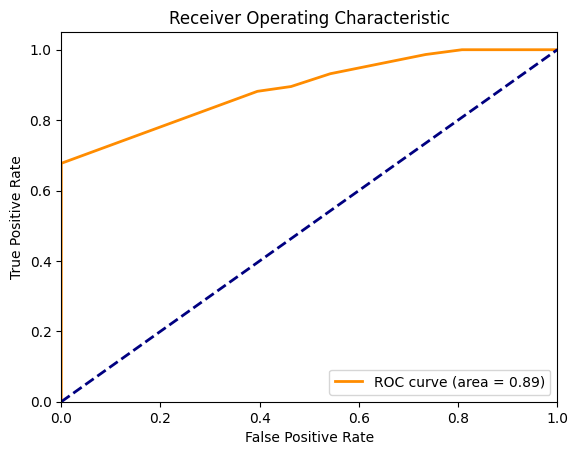

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generate predictions for the evaluation dataset
predictions = trainer.predict(test_dataset)

# Convert predictions to probabilities
y_score = predictions.predictions[:, 1]

# Actual lable
y_true = predictions.label_ids

# ROC
fpr, tpr, _ = roc_curve(y_true, y_score)

# AUROC
roc_auc = auc(fpr, tpr)

# ROC curve
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [42]:
trainer.state.log_history

[{'loss': 0.5674,
  'learning_rate': 2.949748743718593e-05,
  'epoch': 0.05,
  'step': 10},
 {'loss': 0.352,
  'learning_rate': 2.899497487437186e-05,
  'epoch': 0.1,
  'step': 20},
 {'loss': 0.5166,
  'learning_rate': 2.849246231155779e-05,
  'epoch': 0.15,
  'step': 30},
 {'loss': 0.5144,
  'learning_rate': 2.798994974874372e-05,
  'epoch': 0.2,
  'step': 40},
 {'loss': 0.4302,
  'learning_rate': 2.748743718592965e-05,
  'epoch': 0.25,
  'step': 50},
 {'loss': 0.5073,
  'learning_rate': 2.698492462311558e-05,
  'epoch': 0.3,
  'step': 60},
 {'loss': 0.3455,
  'learning_rate': 2.6482412060301507e-05,
  'epoch': 0.35,
  'step': 70},
 {'loss': 0.4288,
  'learning_rate': 2.597989949748744e-05,
  'epoch': 0.4,
  'step': 80},
 {'loss': 0.3904,
  'learning_rate': 2.547738693467337e-05,
  'epoch': 0.45,
  'step': 90},
 {'loss': 0.361,
  'learning_rate': 2.4974874371859298e-05,
  'epoch': 0.5,
  'step': 100},
 {'loss': 0.4287,
  'learning_rate': 2.4472361809045227e-05,
  'epoch': 0.55,
  'ste

In [43]:
# Evaluation 
trainer.evaluate()

  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 0.39109617471694946,
 'eval_acc': 0.8211586901763224,
 'eval_f1': 0.8202646261756734,
 'eval_precision': 0.8568548387096775,
 'eval_recall': 0.8386363636363636,
 'eval_auroc': 0.8386363636363636,
 'eval_avgprc': 0.8561140370964049,
 'eval_runtime': 11.006,
 'eval_samples_per_second': 36.071,
 'eval_steps_per_second': 4.543,
 'epoch': 3.0}

In [44]:
# log result
log_result = trainer.state.log_history
print(log_result)

[{'loss': 0.5674, 'learning_rate': 2.949748743718593e-05, 'epoch': 0.05, 'step': 10}, {'loss': 0.352, 'learning_rate': 2.899497487437186e-05, 'epoch': 0.1, 'step': 20}, {'loss': 0.5166, 'learning_rate': 2.849246231155779e-05, 'epoch': 0.15, 'step': 30}, {'loss': 0.5144, 'learning_rate': 2.798994974874372e-05, 'epoch': 0.2, 'step': 40}, {'loss': 0.4302, 'learning_rate': 2.748743718592965e-05, 'epoch': 0.25, 'step': 50}, {'loss': 0.5073, 'learning_rate': 2.698492462311558e-05, 'epoch': 0.3, 'step': 60}, {'loss': 0.3455, 'learning_rate': 2.6482412060301507e-05, 'epoch': 0.35, 'step': 70}, {'loss': 0.4288, 'learning_rate': 2.597989949748744e-05, 'epoch': 0.4, 'step': 80}, {'loss': 0.3904, 'learning_rate': 2.547738693467337e-05, 'epoch': 0.45, 'step': 90}, {'loss': 0.361, 'learning_rate': 2.4974874371859298e-05, 'epoch': 0.5, 'step': 100}, {'loss': 0.4287, 'learning_rate': 2.4472361809045227e-05, 'epoch': 0.55, 'step': 110}, {'loss': 0.4542, 'learning_rate': 2.3969849246231156e-05, 'epoch':

In [45]:
# Evaluate the model
results = trainer.evaluate(test_dataset)
print(results)

  0%|          | 0/50 [00:00<?, ?it/s]

{'eval_loss': 0.39109617471694946, 'eval_acc': 0.8211586901763224, 'eval_f1': 0.8202646261756734, 'eval_precision': 0.8568548387096775, 'eval_recall': 0.8386363636363636, 'eval_auroc': 0.8386363636363636, 'eval_avgprc': 0.8561140370964049, 'eval_runtime': 10.5606, 'eval_samples_per_second': 37.593, 'eval_steps_per_second': 4.735, 'epoch': 3.0}


  0%|          | 0/50 [00:00<?, ?it/s]

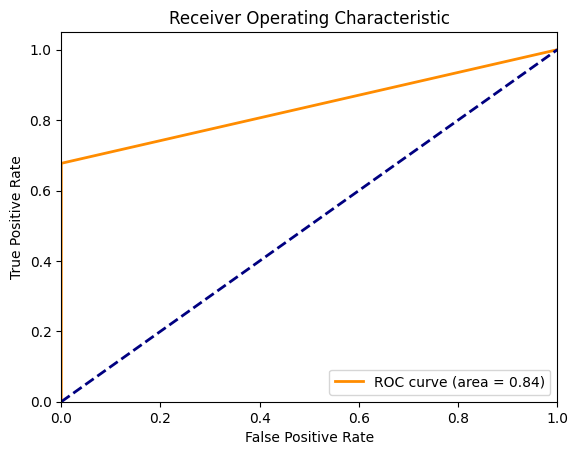

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predictions
predictions = trainer.predict(test_dataset)

# Get the predicted labels
y_pred = np.argmax(predictions.predictions, axis=1)

# Get the true labels
y_true = predictions.label_ids

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_pred)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

{'loss': 0.5674, 'learning_rate': 2.949748743718593e-05, 'epoch': 0.05, 'step': 10}
{'loss': 0.352, 'learning_rate': 2.899497487437186e-05, 'epoch': 0.1, 'step': 20}
{'loss': 0.5166, 'learning_rate': 2.849246231155779e-05, 'epoch': 0.15, 'step': 30}
{'loss': 0.5144, 'learning_rate': 2.798994974874372e-05, 'epoch': 0.2, 'step': 40}
{'loss': 0.4302, 'learning_rate': 2.748743718592965e-05, 'epoch': 0.25, 'step': 50}
{'loss': 0.5073, 'learning_rate': 2.698492462311558e-05, 'epoch': 0.3, 'step': 60}
{'loss': 0.3455, 'learning_rate': 2.6482412060301507e-05, 'epoch': 0.35, 'step': 70}
{'loss': 0.4288, 'learning_rate': 2.597989949748744e-05, 'epoch': 0.4, 'step': 80}
{'loss': 0.3904, 'learning_rate': 2.547738693467337e-05, 'epoch': 0.45, 'step': 90}
{'loss': 0.361, 'learning_rate': 2.4974874371859298e-05, 'epoch': 0.5, 'step': 100}
{'loss': 0.4287, 'learning_rate': 2.4472361809045227e-05, 'epoch': 0.55, 'step': 110}
{'loss': 0.4542, 'learning_rate': 2.3969849246231156e-05, 'epoch': 0.6, 'step'

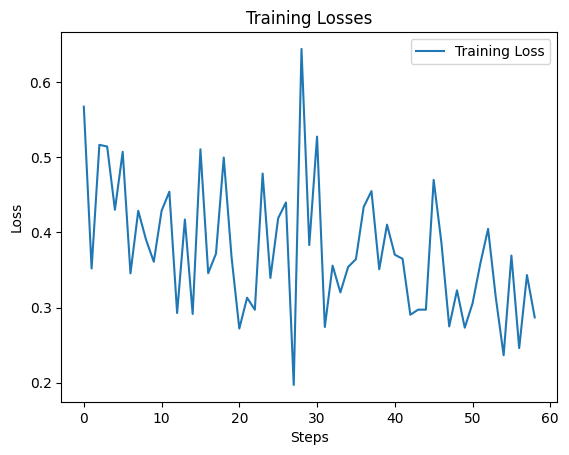

In [47]:
train_losses = []
eval_losses = []
for elem in trainer.state.log_history:
      print(elem)
      if 'loss' in elem.keys():
        train_losses.append(elem['loss'])

# Plot the training and validation losses
import matplotlib.pyplot as plt
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Losses')
plt.legend()
plt.show()

In [48]:
# Generate predictions
predictions_output = trainer.predict(test_dataset)

# Extract the predictions and true labels
predictions2 = np.argmax(predictions_output.predictions, axis=-1)
true_labels2 = predictions_output.label_ids

df_results2 = pd.DataFrame({'True_Labels': true_labels2, 'Predictions': predictions2})

# Display the DataFrame
print(df_results2.head())

  0%|          | 0/50 [00:00<?, ?it/s]

   True_Labels  Predictions
0            1            1
1            1            1
2            0            0
3            1            1
4            1            1


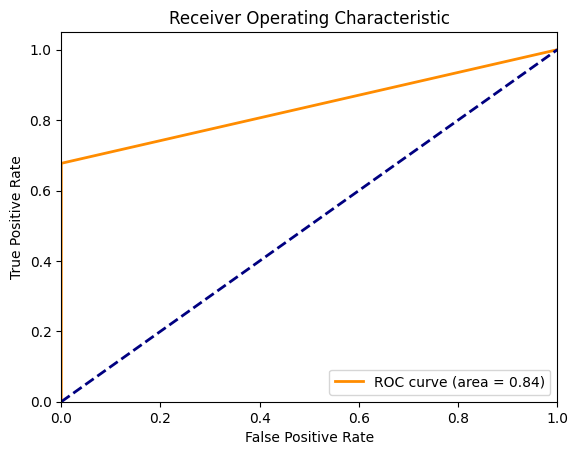

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(df_results2['True_Labels'], df_results2['Predictions'])
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

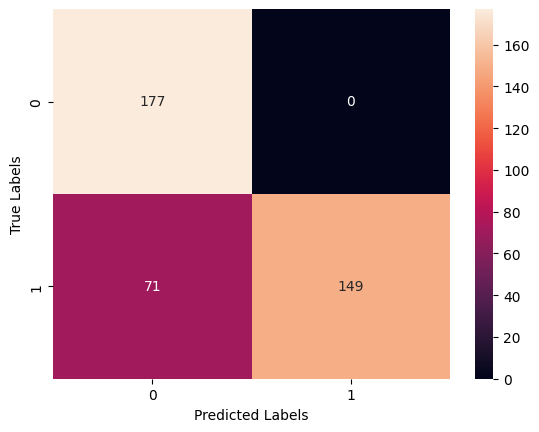

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
conf_matrix = confusion_matrix(df_results2['True_Labels'], df_results2['Predictions'])

# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [53]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 정밀도 계산
precision = precision_score(df_results2['True_Labels'], df_results2['Predictions'], average='weighted')

# 재현율 계산
recall = recall_score(df_results2['True_Labels'], df_results2['Predictions'], average='weighted')

# F1 점수 계산
f1 = f1_score(df_results2['True_Labels'], df_results2['Predictions'], average='weighted')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Precision: 0.8723592264564881
Recall: 0.8211586901763224
F1 Score: 0.818891599317534
